In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
label = LabelEncoder()
label.fit(df['Gender'])
df['Gender'] = label.transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Gender','Age','EstimatedSalary']]
Y = df[['Purchased']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

**Feature Scaling**

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
r1 = pd.DataFrame(y_test,columns=['Y_test'])
r2 = pd.DataFrame(y_pred,columns=['Y_pred'])
final = pd.concat((r1,r2),axis=1)
final

,Y_test,Y_pred
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
380,NaN,NaN
381,NaN,NaN
393,NaN,NaN
395,NaN,NaN


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.91      0.85      0.88        48

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



**Making the Confusion Matrix**

In [ ]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[68,  4],
       [ 7, 41]])

Text(42.0, 0.5, 'Actual')

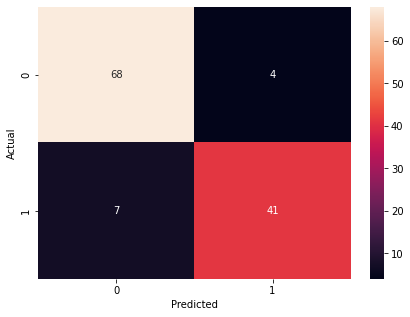

In [ ]:
plt.figure(figsize=(7,5))
sn.heatmap(mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')